In [1]:
# YOLOv8 + OCR 관련 라이브러리
!pip install ultralytics --quiet
!pip install opencv-python-headless pytesseract --quiet
!apt install tesseract-ocr -y
!apt install libgl1-mesa-glx -y  # OpenCV GUI 에러 방지


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 40.1 MB/s eta 0:00:00
Reading package lists... Done
Building depende

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import json

label_path = '/content/drive/MyDrive/Colab Notebooks/ESG_B 딥러닝/data/yolo_data/training/labeling/medicine_00001.json'

with open(label_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

print(json.dumps(data, indent=2, ensure_ascii=False))  # 한글이 깨지지 않게 출력


{
  "Identifier": "medicine_00001",
  "name": "medicine_00001.jpg",
  "src_path": "/result/medicine/images/medicine_00001.jpg",
  "label_path": "/result/medicine/annotations/medicine_00001.json",
  "category": 0,
  "type": 1,
  "images": [
    {
      "identifier": "medicine_00001",
      "name": "medicine_00001.jpg",
      "type": "jpg",
      "width": 2694,
      "height": 2078,
      "data_captured": "2021:09:19 14:02:34",
      "shutter_speed": "320",
      "f_stop": "1.8",
      "gps": "",
      "age": 53,
      "gender": "female",
      "writer_num": "psjspaspa96@naver.com",
      "shooting_env": "실내",
      "dust": "없음",
      "class": "의약품",
      "product_name": "레복사신점안액0.5%(레보플록사신수화물) 5ml",
      "product_category": "의약품_전문의약품"
    }
  ],
  "annotations": [
    {
      "polygons": [
        {
          "id": "005cc8c0-ca7e-44b2-8719-66f5a1878c9a",
          "type": 5,
          "text": "(21)218741462184",
          "points": [
            [
              619.9586035776696,
  

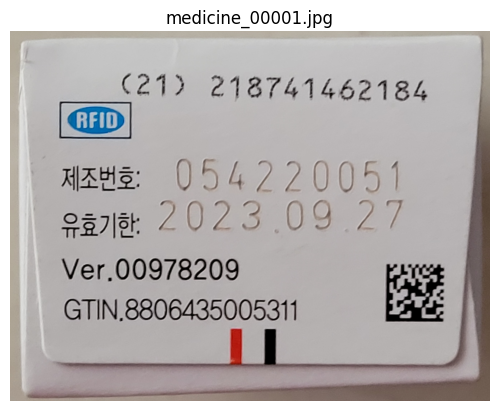

In [7]:
import os
import cv2
import matplotlib.pyplot as plt

# 경로 설정
img_dir = '/content/drive/MyDrive/Colab Notebooks/ESG_B 딥러닝/data/yolo_data/training/image'
label_dir = '/content/drive/MyDrive/Colab Notebooks/ESG_B 딥러닝/data/yolo_data/training/labeling'

# 이미지 파일 불러오기
img_files = sorted([f for f in os.listdir(img_dir) if f.endswith(('.jpg', '.png'))])
img_path = os.path.join(img_dir, img_files[0])

# 이미지 열기 및 시각화
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.title(img_files[0])
plt.axis('off')
plt.show()


In [10]:
import json

label_path = "/content/drive/MyDrive/Colab Notebooks/ESG_B 딥러닝/data/yolo_data/training/labeling/medicine_00001.json"

with open(label_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# annotations -> bbox 가져오기
bboxes = data['annotations'][0]['bbox']  # bbox 리스트

for box in bboxes:
    x = box['x']
    y = box['y']
    w = box['width']
    h = box['height']
    print(f"Box 좌표: x={x}, y={y}, w={w}, h={h}")


Box 좌표: x=618.8790117005273, y=223.058390996303, w=1728.205525300914, h=180.14412636688292
Box 좌표: x=371.3940525608612, y=452.4666159467619, w=232.8052439656854, h=96.2967145494427
Box 좌표: x=283.9499729330374, y=749.2217655478166, w=418.970324204972, h=159.6210822786793
Box 좌표: x=299.3966569558257, y=1495.228071065478, w=1315.410556056783, h=143.87302956871054
Box 좌표: x=281.41252825973686, y=1269.1418817432182, w=1007.1112069809743, h=143.87302956871076
Box 좌표: x=921.1336775920389, y=716.7722146490618, w=1266.5964924531127, h=195.25625441467866
Box 좌표: x=281.41252825973635, y=1014.7949187556767, w=423.246059852212, h=156.71883578020265
Box 좌표: x=826.0747116269979, y=940.2892427290228, w=1384.7779095988396, h=200.39457689927553
Box 좌표: x=708.52135757749, y=781.096044846938, w=20.105954062110982, h=97.65749115882454
Box 좌표: x=709.460906942851, y=1045.3052642746952, w=20.48730015513115, h=98.19774901942151


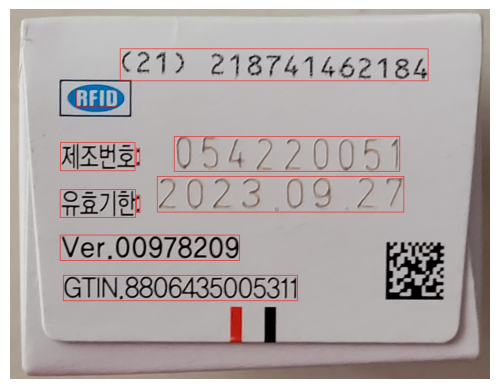

In [11]:
import cv2
import matplotlib.pyplot as plt

img_path = "/content/drive/MyDrive/Colab Notebooks/ESG_B 딥러닝/data/yolo_data/training/image/medicine_00001.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

for box in bboxes:
    x, y, w, h = int(box['x']), int(box['y']), int(box['width']), int(box['height'])
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)  # 파란색 박스

plt.imshow(img)
plt.axis('off')
plt.show()


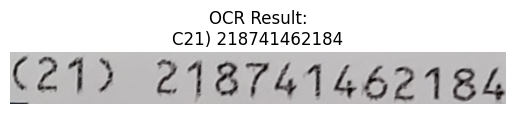

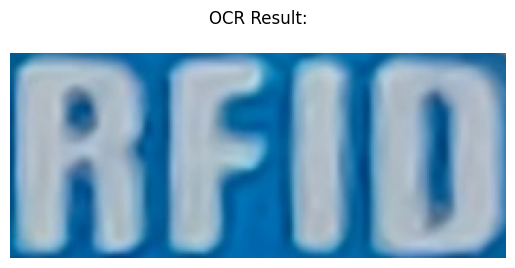

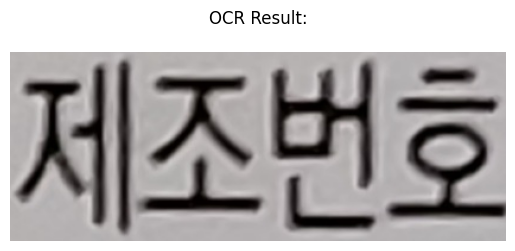

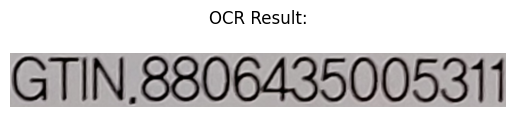

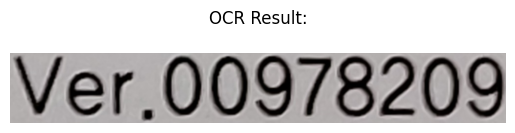

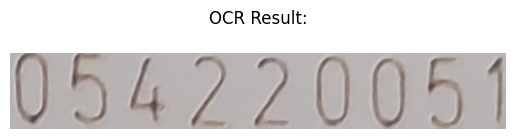

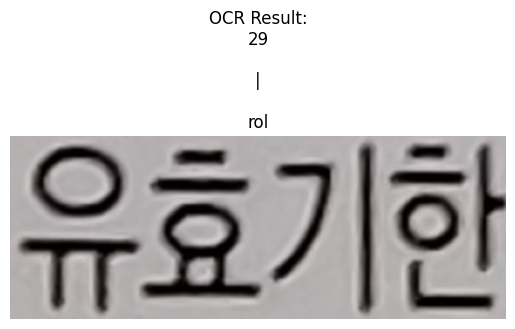

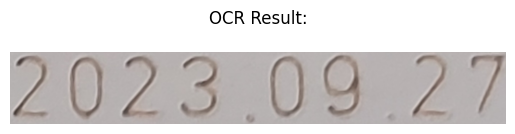

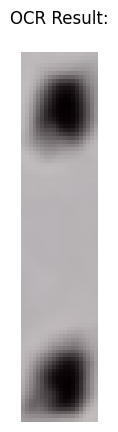

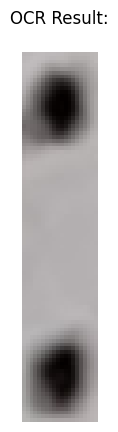

In [13]:
# 'annotations' 배열 첫번째 요소 안에 'bbox' 키가 있다고 가정
bbox_list = data['annotations'][0]['bbox']

for box in bbox_list:
    x, y, w, h = int(box['x']), int(box['y']), int(box['width']), int(box['height'])
    crop_img = img[y:y+h, x:x+w]

    text = pytesseract.image_to_string(crop_img, lang='kor+eng')
    ocr_results.append(text)

    plt.imshow(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))
    plt.title(f'OCR Result:\n{text.strip()}')
    plt.axis('off')
    plt.show()


In [14]:
import pytesseract

for i, box in enumerate(bbox_list):
    x, y, w, h = int(box['x']), int(box['y']), int(box['width']), int(box['height'])
    crop = img_rgb[y:y+h, x:x+w]

    text = pytesseract.image_to_string(crop, lang='kor+eng')
    print(f'[{i+1}] OCR 결과:\n{text}\n')


[1] OCR 결과:
Codey 213741462182


[2] OCR 결과:


[3] OCR 결과:


[4] OCR 결과:


[5] OCR 결과:


[6] OCR 결과:


[7] OCR 결과:
<2)

|

rol


[8] OCR 결과:


[9] OCR 결과:


[10] OCR 결과:




In [15]:
import cv2

for i, box in enumerate(bbox_list):
    x, y, w, h = int(box['x']), int(box['y']), int(box['width']), int(box['height'])
    crop = img_rgb[y:y+h, x:x+w]

    # 그레이스케일 변환
    gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
    # 이진화 (적응형 이진화 추천)
    binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY, 11, 2)

    text = pytesseract.image_to_string(binary, lang='kor+eng', config='--psm 6')
    print(f'[{i+1}] OCR 결과:\n{text}\n')


[1] OCR 결과:
/ ee >. «GF Op the 8: QO fee. ee Y : 7° ts:
C212 ZIBT4I4B2184


[2] OCR 결과:
wry te *
Huse es


[3] OCR 결과:


[4] OCR 결과:
GTIN. 6806435005311


[5] OCR 결과:
NG PL RRB PO PRR
Wi i erre AT ALTOwW AGIA TAA’
Ver QW 9782 Y

EO NW gs NBA IONG NEE UD Nap Le NBC.


[6] OCR 결과:
Oe ACR

Keogh pe TBS Of ZV fy. - 4

ov os i i , ee a Y i » ia . rl ‘ ee { ‘ : ‘ ma : |
x ET oo Bag Naps f “ . J , :


[7] OCR 결과:
C2 = |e f
‘QO - BP KO} i
ae, Ce). ANS ak.


[8] OCR 결과:
pe ( ; . 4 : ah: i x 4 : feo? S oy a . .
fe ON fi ee Me Gh Raed: fff if:
One :§ CO? Meo : 5 = Ze off: lA:

‘ — ow ! é pee eT an Oo Smet ® onlin “ee fale ro


[9] OCR 결과:
a
4


[10] OCR 결과:
$
6




In [16]:
gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (3,3), 0)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(blur)
binary = cv2.adaptiveThreshold(cl1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)


In [17]:
import cv2

for i, box in enumerate(bbox_list):
    x, y, w, h = int(box['x']), int(box['y']), int(box['width']), int(box['height'])
    crop = img_rgb[y:y+h, x:x+w]

    # 그레이스케일 변환
    gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
    # 이진화 (적응형 이진화 추천)
    binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY, 11, 2)

    text = pytesseract.image_to_string(binary, lang='kor+eng', config='--psm 6')
    print(f'[{i+1}] OCR 결과:\n{text}\n')


[1] OCR 결과:
/ ee >. «GF Op the 8: QO fee. ee Y : 7° ts:
C212 ZIBT4I4B2184


[2] OCR 결과:
wry te *
Huse es


[3] OCR 결과:


[4] OCR 결과:
GTIN. 6806435005311


[5] OCR 결과:
NG PL RRB PO PRR
Wi i erre AT ALTOwW AGIA TAA’
Ver QW 9782 Y

EO NW gs NBA IONG NEE UD Nap Le NBC.


[6] OCR 결과:
Oe ACR

Keogh pe TBS Of ZV fy. - 4

ov os i i , ee a Y i » ia . rl ‘ ee { ‘ : ‘ ma : |
x ET oo Bag Naps f “ . J , :


[7] OCR 결과:
C2 = |e f
‘QO - BP KO} i
ae, Ce). ANS ak.


[8] OCR 결과:
pe ( ; . 4 : ah: i x 4 : feo? S oy a . .
fe ON fi ee Me Gh Raed: fff if:
One :§ CO? Meo : 5 = Ze off: lA:

‘ — ow ! é pee eT an Oo Smet ® onlin “ee fale ro


[9] OCR 결과:
a
4


[10] OCR 결과:
$
6




In [18]:
!pip install easyocr

import easyocr
reader = easyocr.Reader(['ko', 'en'])
result = reader.readtext(crop)
print(result)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 969.6/969.6 kB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 14.3 MB/s eta 0:00:00


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete[]


텍스트: (27), 신뢰도: 0.75
텍스트: 278747462784, 신뢰도: 0.49
텍스트: RFID, 신뢰도: 1.00
텍스트: 제조번호:, 신뢰도: 0.96
텍스트: 05 4 2 2 00 5 /, 신뢰도: 0.48
텍스트: 유호기한: 2 0 2 3, 신뢰도: 0.42
텍스트: 09, 신뢰도: 1.00
텍스트: 27, 신뢰도: 0.71
텍스트: Ver.00978209, 신뢰도: 0.59
텍스트: }n=, 신뢰도: 0.01
텍스트: GTIN,8806435005311, 신뢰도: 0.80


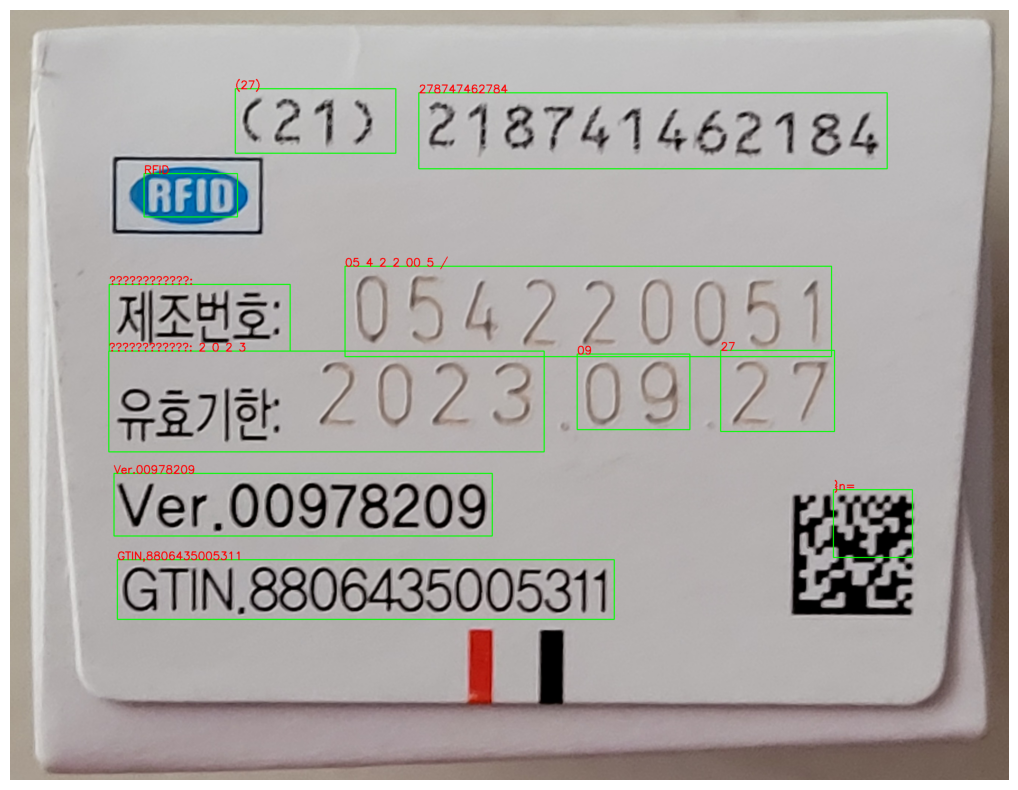

In [19]:
import easyocr
import cv2
import matplotlib.pyplot as plt

# EasyOCR 리더 객체 생성 (한국어, 영어 인식)
reader = easyocr.Reader(['ko', 'en'])

# 이미지 불러오기 (예: crop 이미지 파일 경로 또는 numpy 배열)
img_path = '/content/drive/MyDrive/Colab Notebooks/ESG_B 딥러닝/data/yolo_data/training/image/medicine_00001.jpg'
img = cv2.imread(img_path)

# 만약 crop 이미지가 이미 있다면 바로 사용해도 됨
# img = cv2.imread('crop_img.jpg')

# EasyOCR로 텍스트 읽기
result = reader.readtext(img)

# 결과 출력
for (bbox, text, prob) in result:
    print(f"텍스트: {text}, 신뢰도: {prob:.2f}")

# 결과 시각화 (bbox 표시)
for (bbox, text, prob) in result:
    pts = bbox
    for i in range(4):
        cv2.line(img, tuple(map(int, pts[i])), tuple(map(int, pts[(i+1) % 4])), (0,255,0), 2)
    cv2.putText(img, text, tuple(map(int, pts[0])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

plt.figure(figsize=(15,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [20]:
!pip install easyocr

import easyocr
import cv2
from google.colab.patches import cv2_imshow

# 이미지 경로 지정 (Colab에 이미지 업로드하거나 Google Drive 경로로 변경)
image_path = '/content/drive/MyDrive/Colab Notebooks/ESG_B 딥러닝/data/yolo_data/image/medicine_00001.jpg'

# 이미지 읽기
img = cv2.imread(image_path)

# 이미지 보여주기 (선택 사항)
cv2_imshow(img)

# EasyOCR Reader 생성 (한글 ko, 영어 en 포함)
reader = easyocr.Reader(['ko', 'en'])

# OCR 수행
result = reader.readtext(img)

# 결과 출력 (한글 깨짐 방지)
for i, (bbox, text, prob) in enumerate(result):
    print(f"[{i+1}] OCR 결과:")
    print(text.encode('utf-8').decode('utf-8'))
    print()


AttributeError: 'NoneType' object has no attribute 'clip'

In [24]:
import cv2

image_path = r'/content/drive/MyDrive/Colab Notebooks/ESG_B 딥러닝/data/yolo_data/image/medicine_00001.jpg'

img = cv2.imread(image_path)

if img is None:
    print("이미지를 불러오지 못했습니다. 경로를 다시 확인하세요.")
else:
    print("이미지 정상적으로 불러옴!")


이미지를 불러오지 못했습니다. 경로를 다시 확인하세요.


In [22]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
from google.colab import drive
drive.mount('/content/drive')  # 드라이브 재마운트

image_path = r'/content/drive/MyDrive/Colab Notebooks/ESG_B 딥러닝/data/yolo_data/image/medicine_00001.jpg'

import os
print(os.path.exists(image_path))  # 파일 존재 여부 확인

import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread(image_path)
if img is None:
    print("이미지 읽기 실패!")
else:
    cv2_imshow(img)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
False
이미지 읽기 실패!


In [26]:
!ls

drive  sample_data


In [27]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
img_path = '/content/drive/MyDrive/Colab Notebooks/ESG_B 딥러닝/data/yolo_data/image/medicine_00001.jpg'


In [30]:
!ls '/content/drive/MyDrive/Colab Notebooks/ESG_B 딥러닝/data/yolo_data/'


training


In [31]:
!ls '/content/drive/MyDrive/Colab Notebooks/ESG_B 딥러닝/data/yolo_data/training'


image  labeling


In [32]:
img_path = '/content/drive/MyDrive/Colab Notebooks/ESG_B 딥러닝/data/yolo_data/training/image/medicine_00001.jpg'
label_path = '/content/drive/MyDrive/Colab Notebooks/ESG_B 딥러닝/data/yolo_data/training/labeling/medicine_00001.json'


In [33]:
!pip install easyocr

import easyocr
import cv2
from google.colab.patches import cv2_imshow

# 이미지 경로 지정 (Colab에 이미지 업로드하거나 Google Drive 경로로 변경)
image_path = '/content/drive/MyDrive/Colab Notebooks/ESG_B 딥러닝/data/yolo_data/training/image/medicine_00001.jpg'

# 이미지 읽기
img = cv2.imread(image_path)

# 이미지 보여주기 (선택 사항)
cv2_imshow(img)

# EasyOCR Reader 생성 (한글 ko, 영어 en 포함)
reader = easyocr.Reader(['ko', 'en'])

# OCR 수행
result = reader.readtext(img)

# 결과 출력 (한글 깨짐 방지)
for i, (bbox, text, prob) in enumerate(result):
    print(f"[{i+1}] OCR 결과:")
    print(text.encode('utf-8').decode('utf-8'))
    print()


Output hidden; open in https://colab.research.google.com to view.

In [34]:
import re

def clean_ocr_text(text):
    # 한글/숫자/영문 기본 허용, 특수문자 최소화
    text = text.strip()

    # 예) '유호기한' -> '유효기한' 치환
    text = text.replace('유호기한', '유효기한')
    text = text.replace('유호기항', '유효기한')  # OCR 오타 여러 경우 대비

    # 날짜 같은 패턴 추출 (ex: 2023.09.27, 2023-09-27, 20230927 등)
    date_pattern = r'(\d{4}[-.]?\d{1,2}[-.]?\d{1,2})'
    dates = re.findall(date_pattern, text)

    # 숫자만 따로 추출도 가능
    numbers = re.findall(r'\d+', text)

    # 키워드 중심 필터링 (예: '유효기한', '제조번호', 'RFID' 등)
    keywords = ['유효기한', '제조번호', 'RFID', 'GTIN']
    for kw in keywords:
        if kw in text:
            print(f"키워드 '{kw}' 발견: {text}")

    return text, dates, numbers

# OCR 결과 예시
ocr_texts = [
    "유호기한: 2023.09.27",
    "제조번호: 05422005",
    "GTIN,8806435005311",
    "RFID",
    "Some garbled text"
]

for t in ocr_texts:
    cleaned, dates, nums = clean_ocr_text(t)
    print(f"원본: {t}\n정제: {cleaned}\n날짜: {dates}\n숫자: {nums}\n")


키워드 '유효기한' 발견: 유효기한: 2023.09.27
원본: 유호기한: 2023.09.27
정제: 유효기한: 2023.09.27
날짜: ['2023.09.27']
숫자: ['2023', '09', '27']

키워드 '제조번호' 발견: 제조번호: 05422005
원본: 제조번호: 05422005
정제: 제조번호: 05422005
날짜: ['05422005']
숫자: ['05422005']

키워드 'GTIN' 발견: GTIN,8806435005311
원본: GTIN,8806435005311
정제: GTIN,8806435005311
날짜: ['88064350']
숫자: ['8806435005311']

키워드 'RFID' 발견: RFID
원본: RFID
정제: RFID
날짜: []
숫자: []

원본: Some garbled text
정제: Some garbled text
날짜: []
숫자: []

